In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from skimage.measure import shannon_entropy
import seaborn as sns
import pandas as pd

In [3]:
pano_path = '/content/drive/MyDrive/capstone_periodontal/data_all_fin/pano'
peri_path = '/content/drive/MyDrive/capstone_periodontal/data_all_fin/peri'
augmented_pano_path = '/content/drive/MyDrive/capstone_periodontal/augmented_datasets/pano'
augmented_peri_path = '/content/drive/MyDrive/capstone_periodontal/augmented_datasets/peri'

## Compare Image Quality Metrics

- brightness
- contrast
- entropy -> shannon_entropy (amount of complexity in the image)
    - Low entropy = smooth image, few details (e.g., a plain black film).
    - High entropy = detailed or textured image (e.g., a rich X-ray with bones, screws, and tissue).
- SNR = (mean pixel value)/(standard deviation)
    - High SNR = Clean, uniform images.
    - Low SNR = Noisy or inconsistent (due to poor lighting, artifacts, etc.).


In [4]:
def analyze_image_folder(folder_path, file_extension="jpg"):
    def compute_snr(image):
        mean = np.mean(image)
        std = np.std(image)
        return mean / std if std != 0 else 0

    # Step 1: Collect all image paths
    image_paths = glob.glob(os.path.join(folder_path, "**", f"*.{file_extension}"), recursive=True)

    brightnesses = []
    contrasts = []
    histograms = []
    entropies = []
    snrs = []
    filenames = []

    print(f"Found {len(image_paths)} images.")

    # Step 2: Loop through all images
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue

        brightness = np.mean(img)
        contrast = np.std(img)
        entropy = shannon_entropy(img)
        snr = compute_snr(img)

        # 256-bin histogram
        hist = cv2.calcHist([img], [0], None, [256], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()

        # Save metrics
        brightnesses.append(brightness)
        contrasts.append(contrast)
        entropies.append(entropy)
        snrs.append(snr)
        histograms.append(hist)
        filenames.append(os.path.basename(path))

    # Step 3: Plot Brightness vs Contrast
    plt.figure(figsize=(8,6))
    plt.scatter(brightnesses, contrasts, alpha=0.5)
    plt.xlabel("Brightness (Mean Pixel Value)")
    plt.ylabel("Contrast (Pixel Std Dev)")
    plt.title("X-ray Style Distribution (Brightness vs Contrast)")
    plt.grid(True)
    plt.show()

    # Step 4: PCA and t-SNE
    X = np.array(histograms)

    # PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(8,6))
    plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)
    plt.title("PCA of Image Histogram Features")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid(True)
    plt.show()

    # t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
    X_tsne = tsne.fit_transform(X)
    plt.figure(figsize=(8,6))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.6)
    plt.title("t-SNE of Image Histogram Features")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.show()

    # Step 5: Pairplot of metrics
    df_metrics = pd.DataFrame({
        "filename": filenames,
        "brightness": brightnesses,
        "contrast": contrasts,
        "entropy": entropies,
        "snr": snrs
    })

    sns.pairplot(df_metrics[["brightness", "contrast", "entropy", "snr"]])
    plt.suptitle("Image Quality Metric Relationships", y=1.02)
    plt.show()

    return df_metrics

# Pano image analysis

Found 189 images.


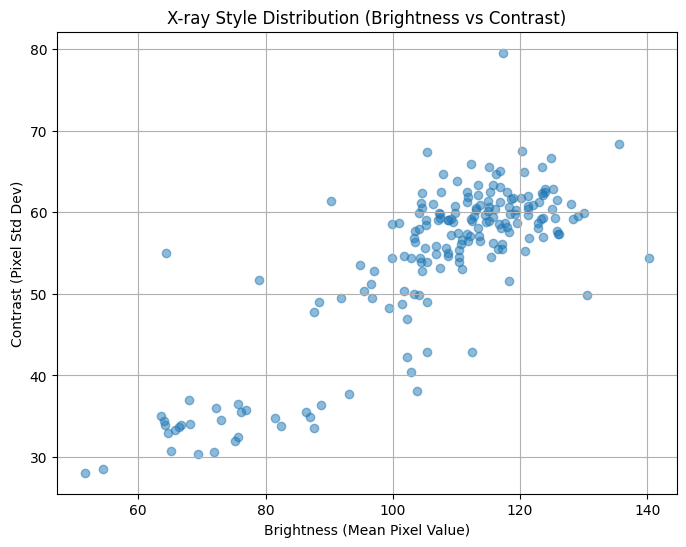

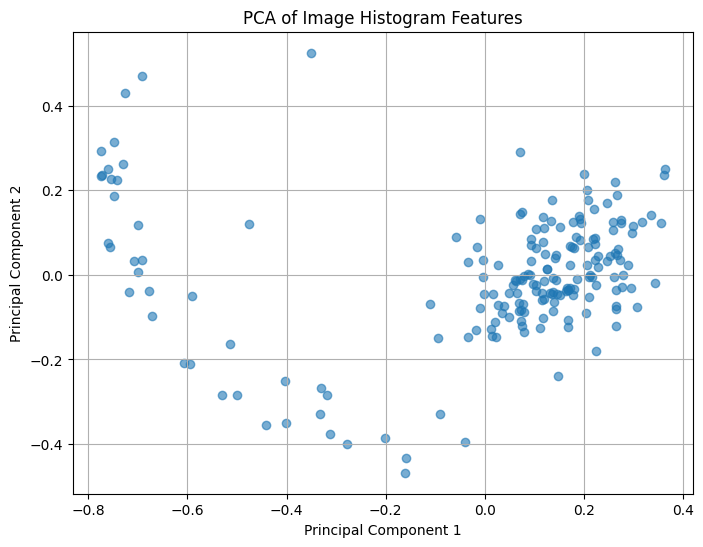

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


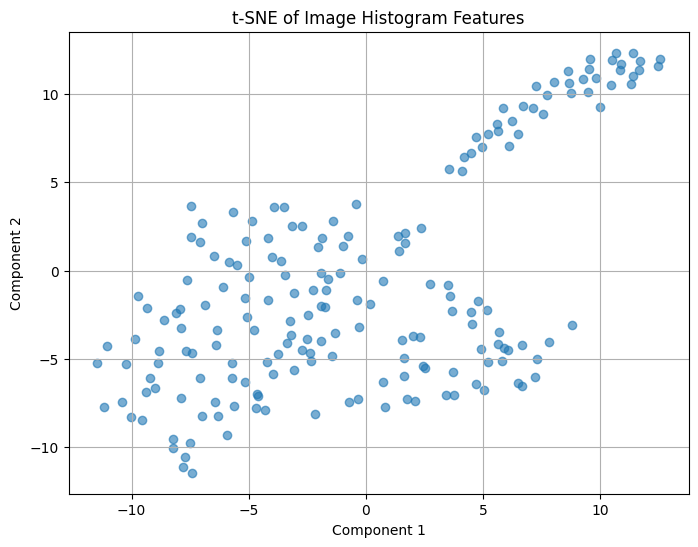

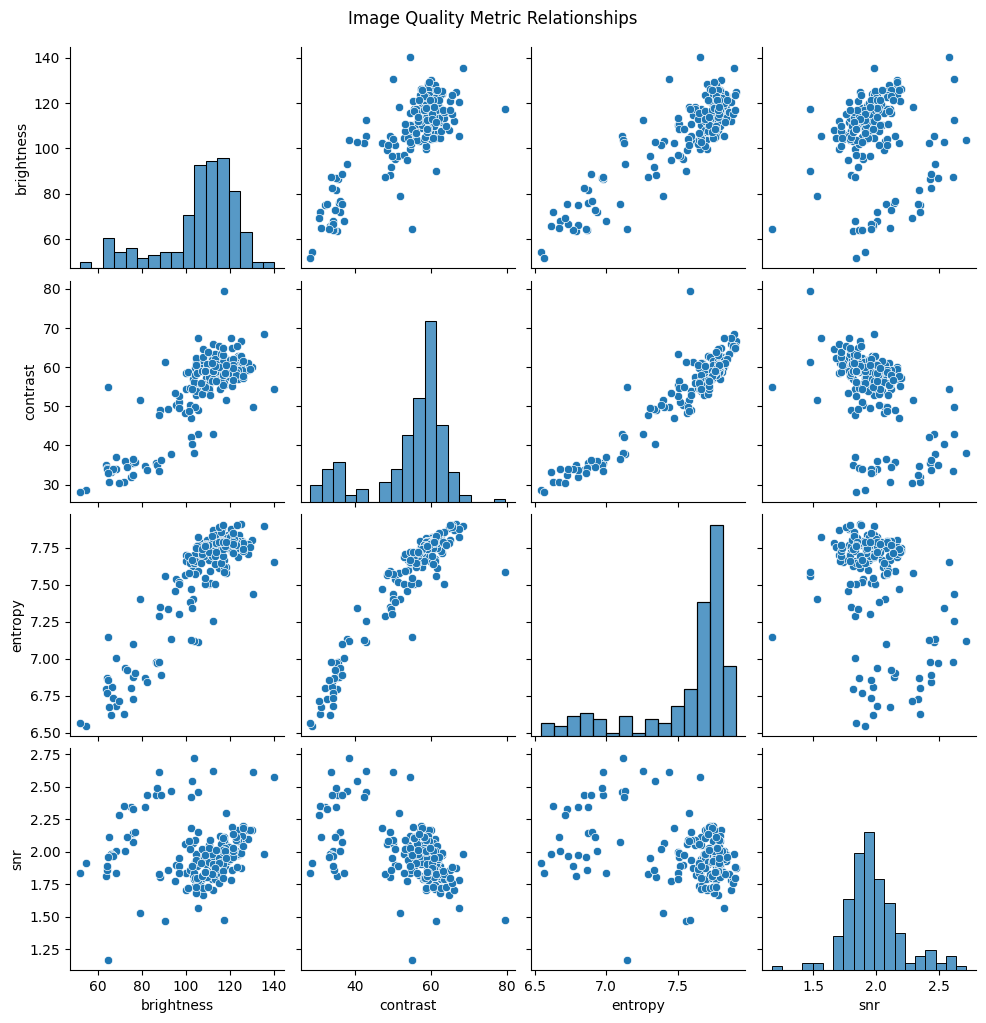

In [6]:
pano_analyze_df = analyze_image_folder(pano_path, 'jpg')

# Peri Image Analysis

Found 146 images.


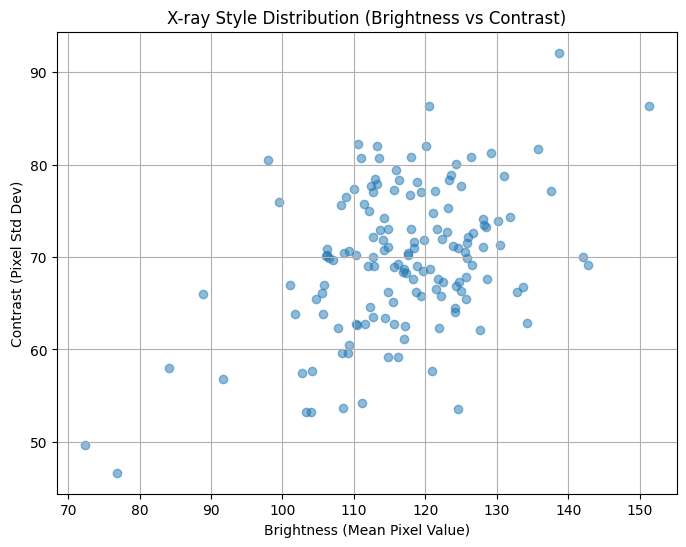

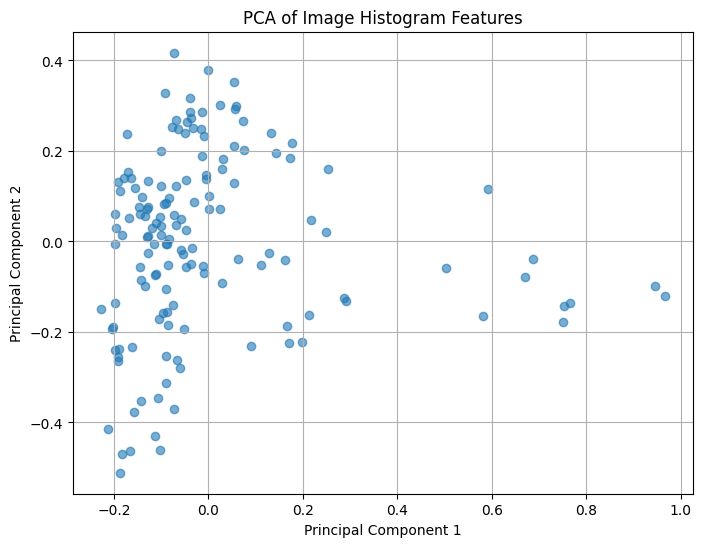

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


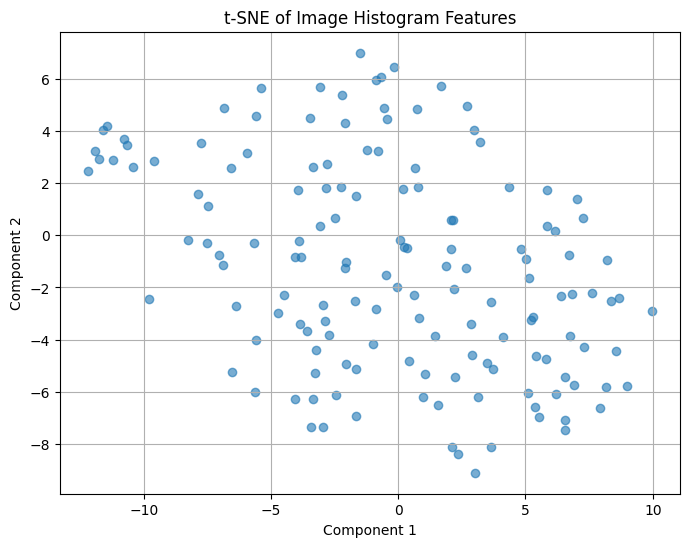

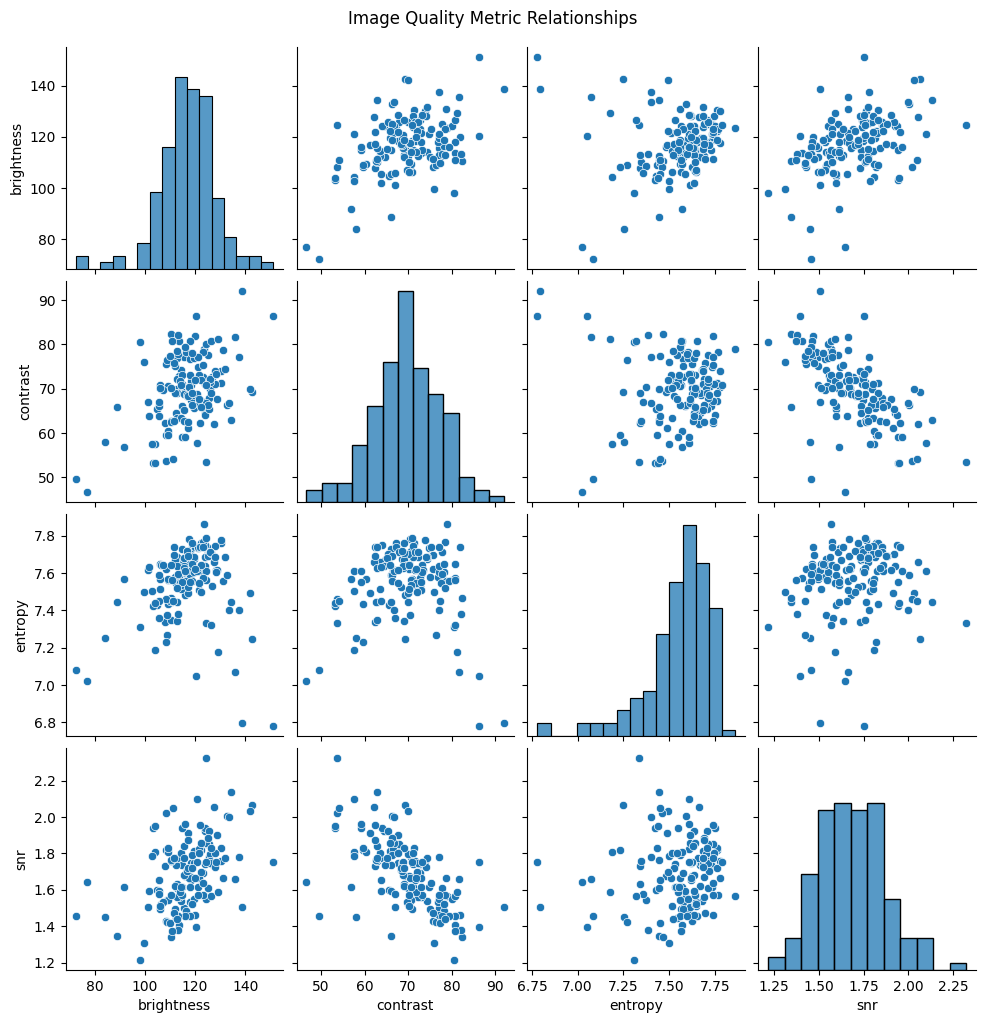

In [8]:
peri_analyze_df = analyze_image_folder(peri_path, 'jpg')

# Augmented Pano Image Analysis

Found 929 images.


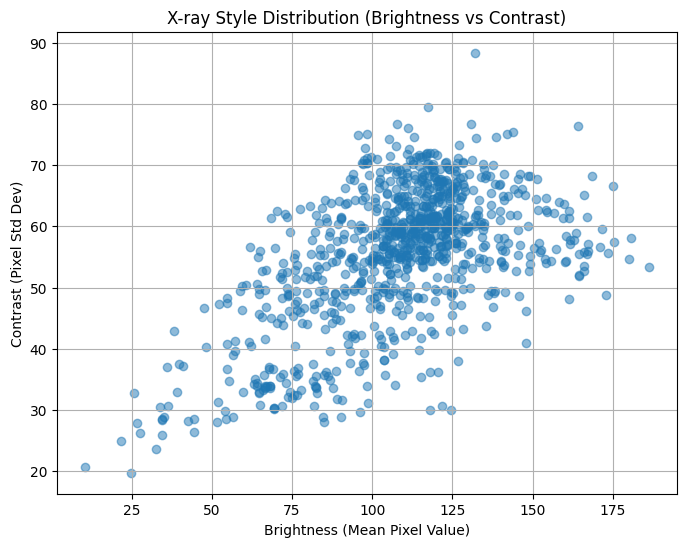

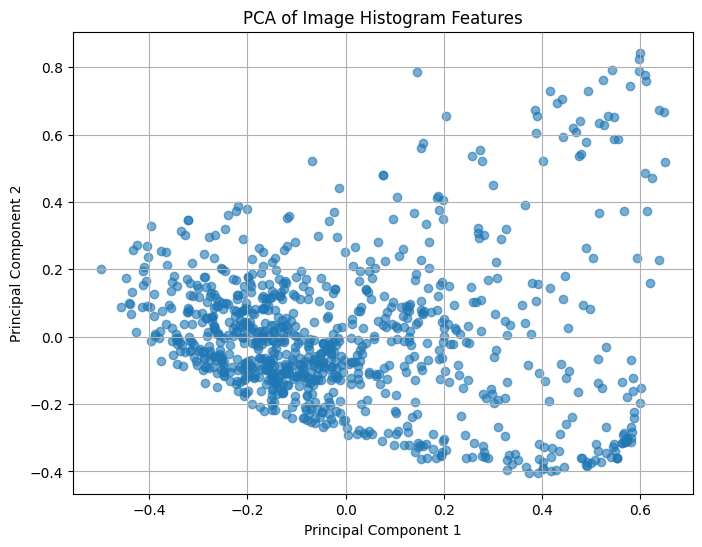

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


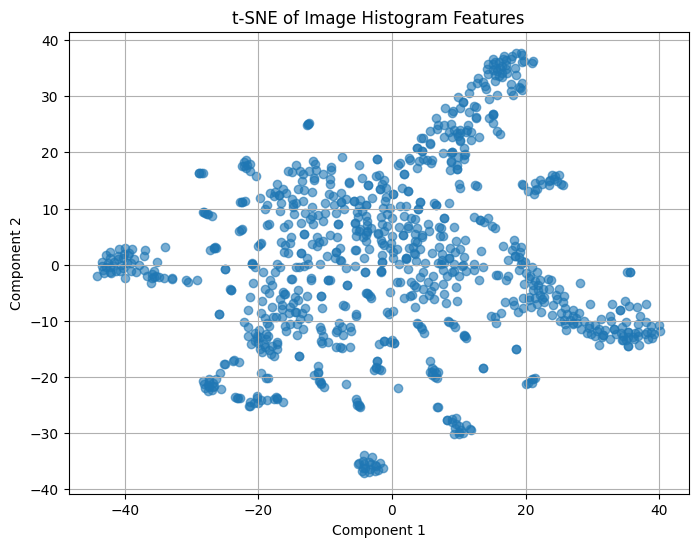

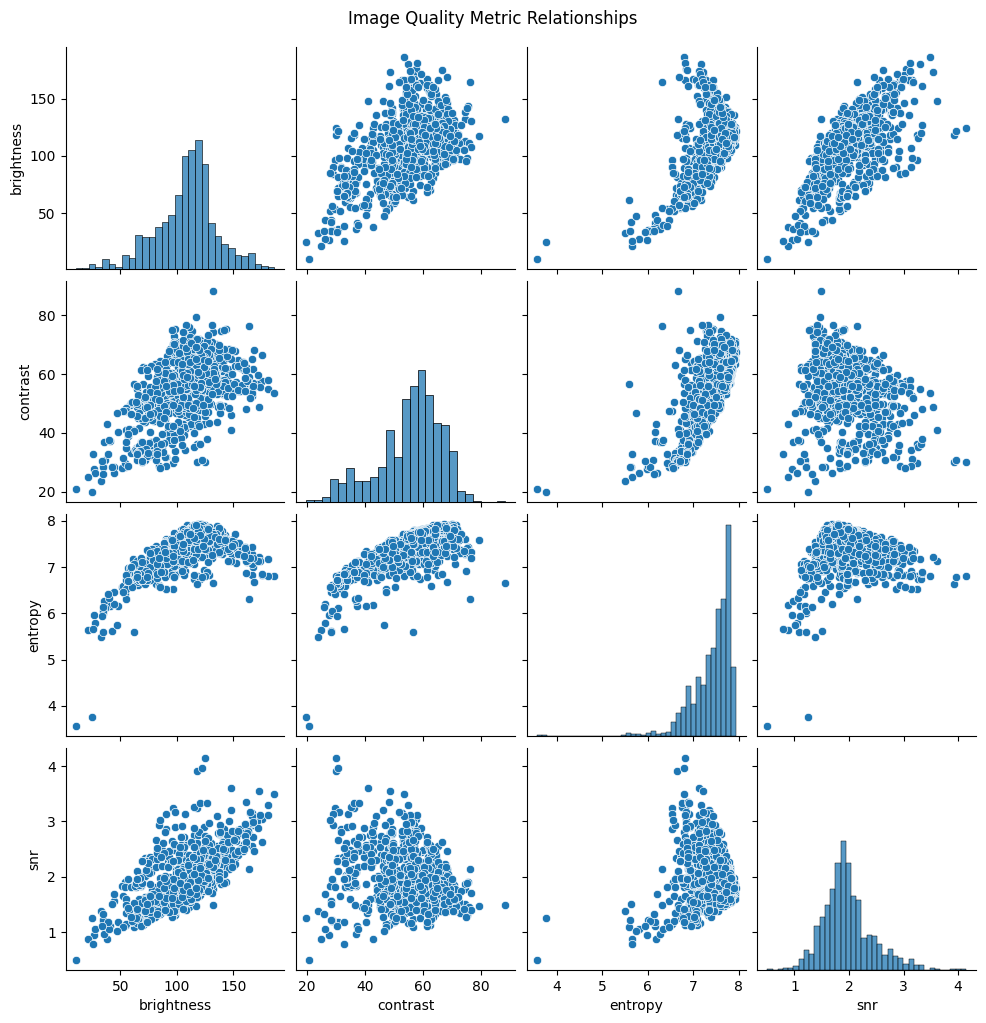

In [9]:
augmented_pano_analyze_df = analyze_image_folder(augmented_pano_path, 'png')

# Augmented Peri Image Analysis

Found 730 images.


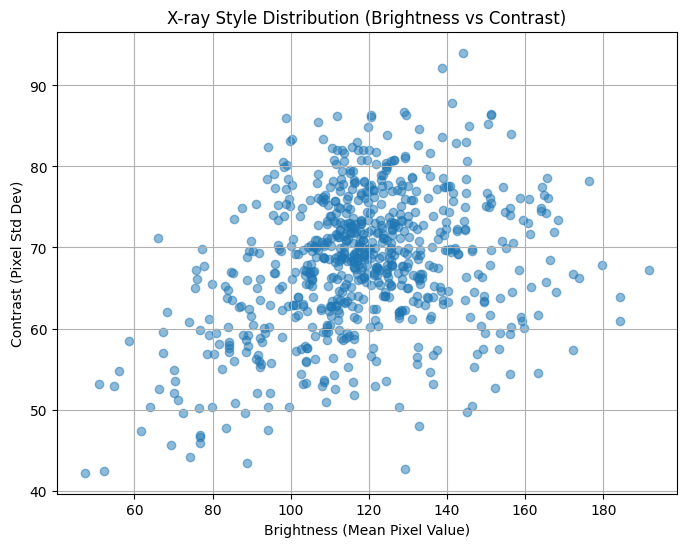

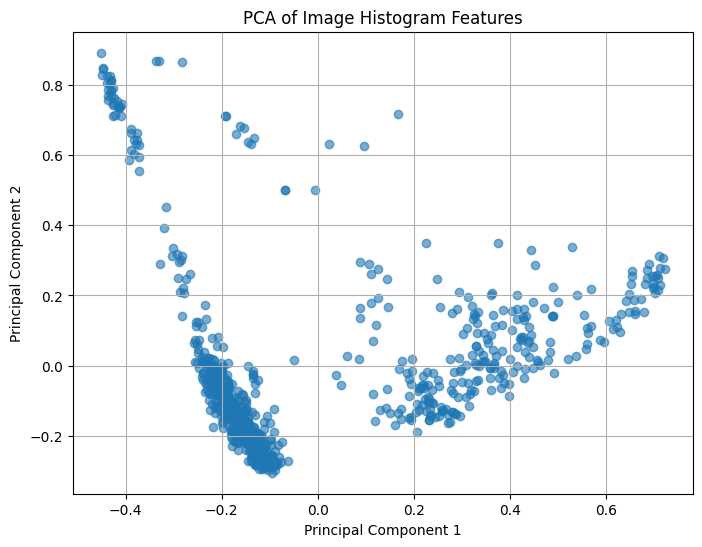

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


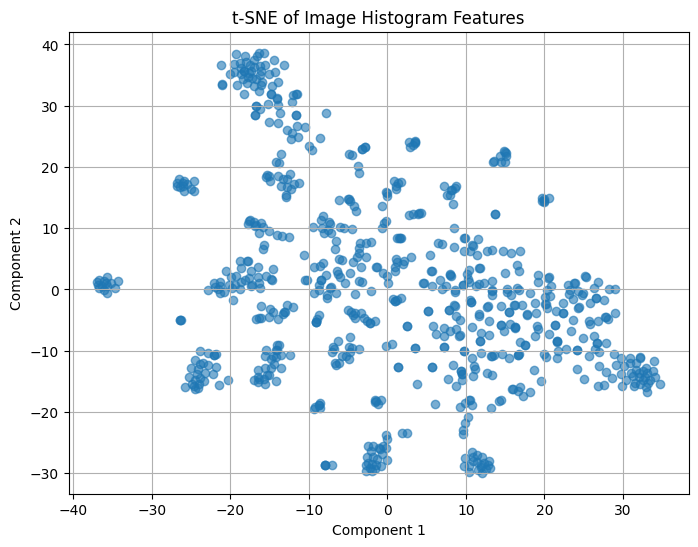

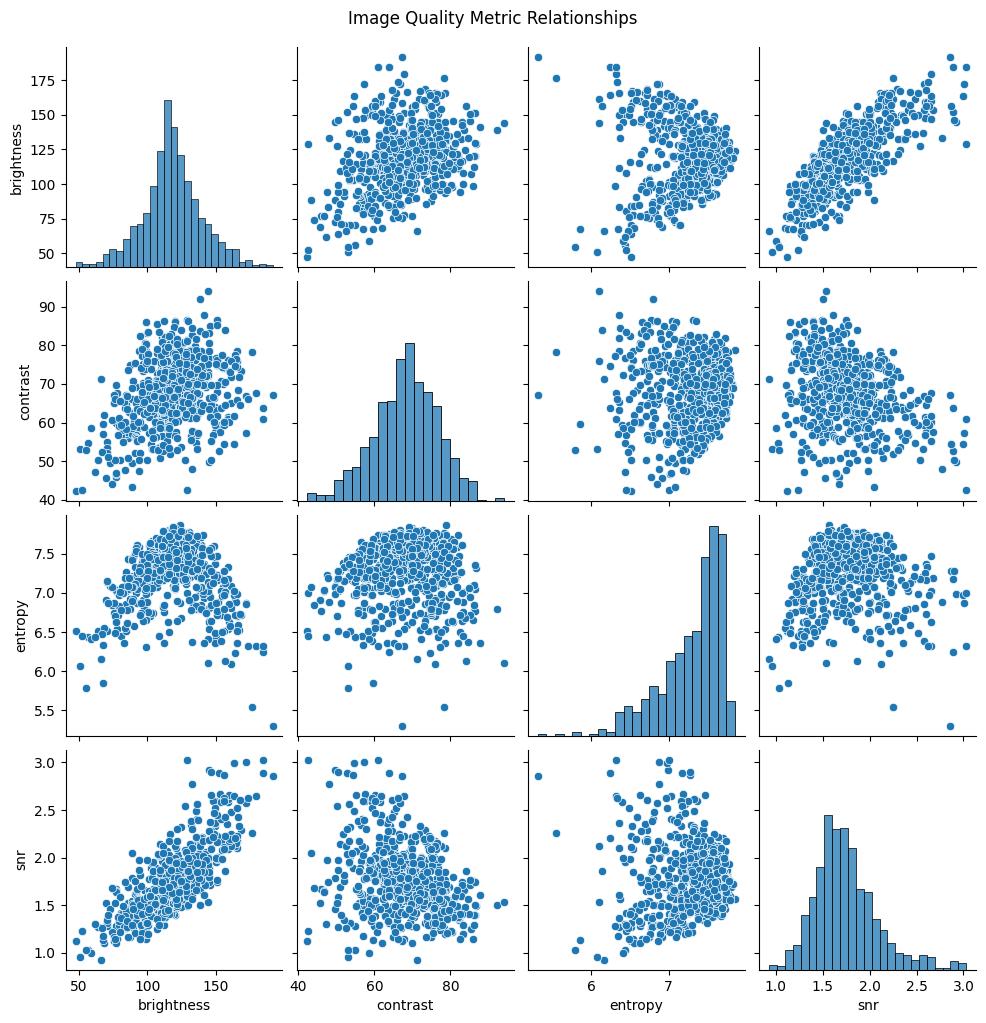

In [10]:
augmented_peri_analyze_df = analyze_image_folder(augmented_peri_path, 'png')